In [2]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout 
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from keras.datasets import cifar10

In [4]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()


In [5]:
type(xtrain)


numpy.ndarray

In [6]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [7]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

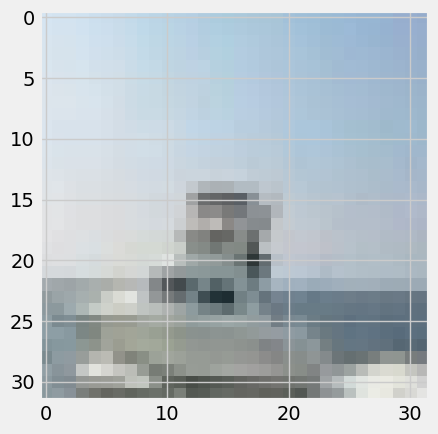

In [8]:
img0=plt.imshow(xtrain[100])

In [9]:
#get image label
lab1=ytrain[100]
print(lab1)

[8]


In [10]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [12]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [13]:
ytrain_one_hot[10]  #000100000 #000100000

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [14]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [15]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [16]:
xtrain[10]


array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [17]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

C:\Users\1333p\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.2403 - loss: 2.0143 - val_accuracy: 0.4288 - val_loss: 1.5227
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.4500 - loss: 1.4837 - val_accuracy: 0.5468 - val_loss: 1.2691
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.5336 - loss: 1.2884 - val_accuracy: 0.5986 - val_loss: 1.1296
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.5899 - loss: 1.1465 - val_accuracy: 0.5965 - val_loss: 1.1338
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6208 - loss: 1.0600 - val_accuracy: 0.6392 - val_loss: 1.0243
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6557 - loss: 0.9820 - val_accuracy: 0.6517 - val_loss: 1.0056
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.6778 - loss: 0.9173 - val_accuracy: 0.6652 - val_loss: 0.9723
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.7021 - loss: 0.8424 

In [77]:
model.evaluate(xtest,ytest_one_hot)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6944 - loss: 0.9196


[0.9442020654678345, 0.6868000030517578]

In [78]:
cat=plt.imread('cat_2.jpeg')

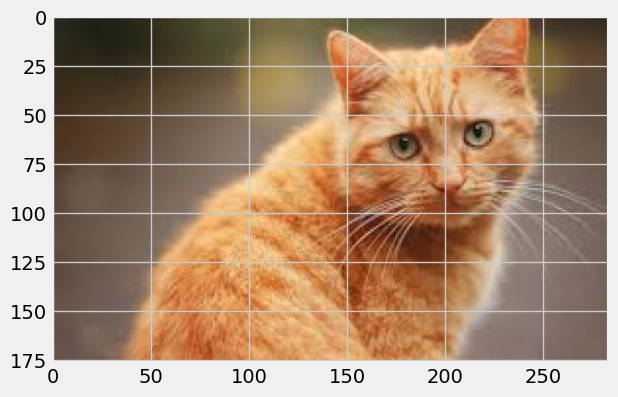

In [79]:
img=plt.imshow(cat)

In [80]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [81]:
resize=transform.resize(cat,(32,32,3))

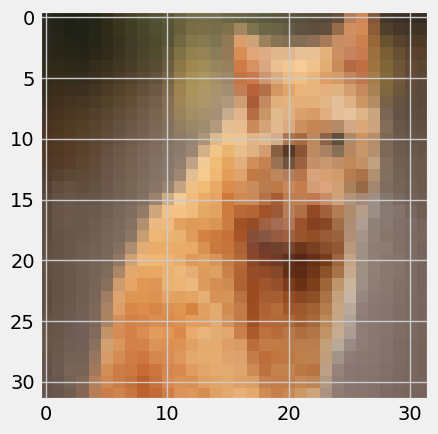

In [82]:
img=plt.imshow(resize)

In [83]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[5.9473218e-04 5.3965108e-05 1.2928157e-01 2.2196119e-01 3.0476421e-01
  2.6427281e-01 4.4485830e-02 3.4306310e-02 1.4115260e-04 1.3824740e-04]]


In [84]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[4, 5, 3, 2, 6, 7, 0, 8, 9, 1]


In [85]:
for i in range(5):
        print(classification[list_index[i]])


deer
dog
cat
bird
frog


In [86]:
!pip install keras

In [89]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout 
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
xtrain=xtrain/255
xtest=xtest/255
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=10,validation_split=0.2)
model.evaluate(xtest,ytest_one_hot)
cat=plt.imread('index.jpeg')
from skimage import transform
resize=transform.resize(cat,(32,32,3))
prediction=model.predict(np.array([resize]))
print(prediction)
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)
for i in range(5):
        print(classification[list_index[i]])


C:\Users\1333p\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0973 - loss: 2.3083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
[[0.09291013 0.09870099 0.09963768 0.10420419 0.10156251 0.09117398
  0.10206439 0.11305294 0.09643827 0.10025484]]
[7, 3, 6, 4, 9, 2, 1, 8, 0, 5]
horse
cat
frog
deer
truck
